In [1]:
import pandas as pd
import numpy as np
import evaluation

## load_data

In [3]:
# load prices
prices = pd.read_csv('example_prices.csv', index_col='dates', parse_dates=['dates'])


In [5]:
prices.head()

,diamonds,butter,cars,cucumber,bananas
dates,,,,,
2000-01-03,1578.85,923.03,1231.12,1036.35,669.36
2000-01-04,1576.77,926.42,1231.34,1037.28,668.78
2000-01-05,1575.44,927.01,1229.38,1038.33,666.96
2000-01-06,1574.65,928.27,1230.93,1038.07,674.68
2000-01-07,1575.08,929.76,1232.27,1039.12,677.95


In [9]:
np.power(prices.ffill().diff(), 2)

,diamonds,butter,cars,cucumber,bananas
dates,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,4.3264,11.4921,0.0484,0.8649,0.3364
2000-01-05,1.7689,0.3481,3.8416,1.1025,3.3124
2000-01-06,0.6241,1.5876,2.4025,0.0676,59.5984
2000-01-07,0.1849,2.2201,1.7956,1.1025,10.6929
...,...,...,...,...,...
2023-01-05,4.1209,0.0256,4.8841,0.3364,11.2896
2023-01-06,0.6400,2.8224,9.0601,0.1089,24.1081
2023-01-09,0.2304,2.2201,5.0625,0.7744,1.6384


In [47]:
trend_window, vol_window = 50, 100
ret = prices.ffill().diff()
pos = pd.DataFrame(np.nan, index=ret.index, columns=ret.columns)
t = 100

# Volatility estimate; standard deviation on the last vol_window days, up to t-1
vol = np.sqrt((ret**2).iloc[t-vol_window:t].mean())

In [48]:
vol

diamonds    1.548068
butter      1.989068
cars        2.150341
cucumber    0.930560
bananas     4.146302
dtype: float64

In [49]:
# Mean return between t-trend_window and t-1
block_ret = ret.iloc[t-trend_window:t].sum()

In [53]:
block_ret

diamonds     5.81
butter      10.43
cars         7.24
cucumber     4.09
bananas     32.21
dtype: float64

In [54]:
# Take a long position if the 50-days return is positive, otherwise take a short position (sign of the block return)
unadj_pos = np.sign(block_ret)

In [ ]:
# Position at date t; risk adjust with volatility from previous date
pos.iloc[t+1] = unadj_pos / vol

## enter your own trading strategy here

In [4]:
def trend_model(prices, trend_window=50, vol_window=100):
    ret = prices.ffill().diff()
    
    pos = pd.DataFrame(np.nan, index=ret.index, columns=ret.columns)
    # loop over all dates
    for t in range(ret.shape[0]-1):
        # Volatility estimate; standard deviation on the last vol_window days, up to t-1
        vol = np.sqrt((ret**2).iloc[t-vol_window:t].mean())
        
        # Mean return between t-trend_window and t-1
        block_ret = ret.iloc[t-trend_window:t].sum()
        # Take a long position if the 50-days return is positive, otherwise take a short position (sign of the block return)
        unadj_pos = np.sign(block_ret)
        
        # Position at date t; risk adjust with volatility from previous date
        pos.iloc[t+1] = unadj_pos / vol
    return pos

position = trend_model(prices)

## evaluate results

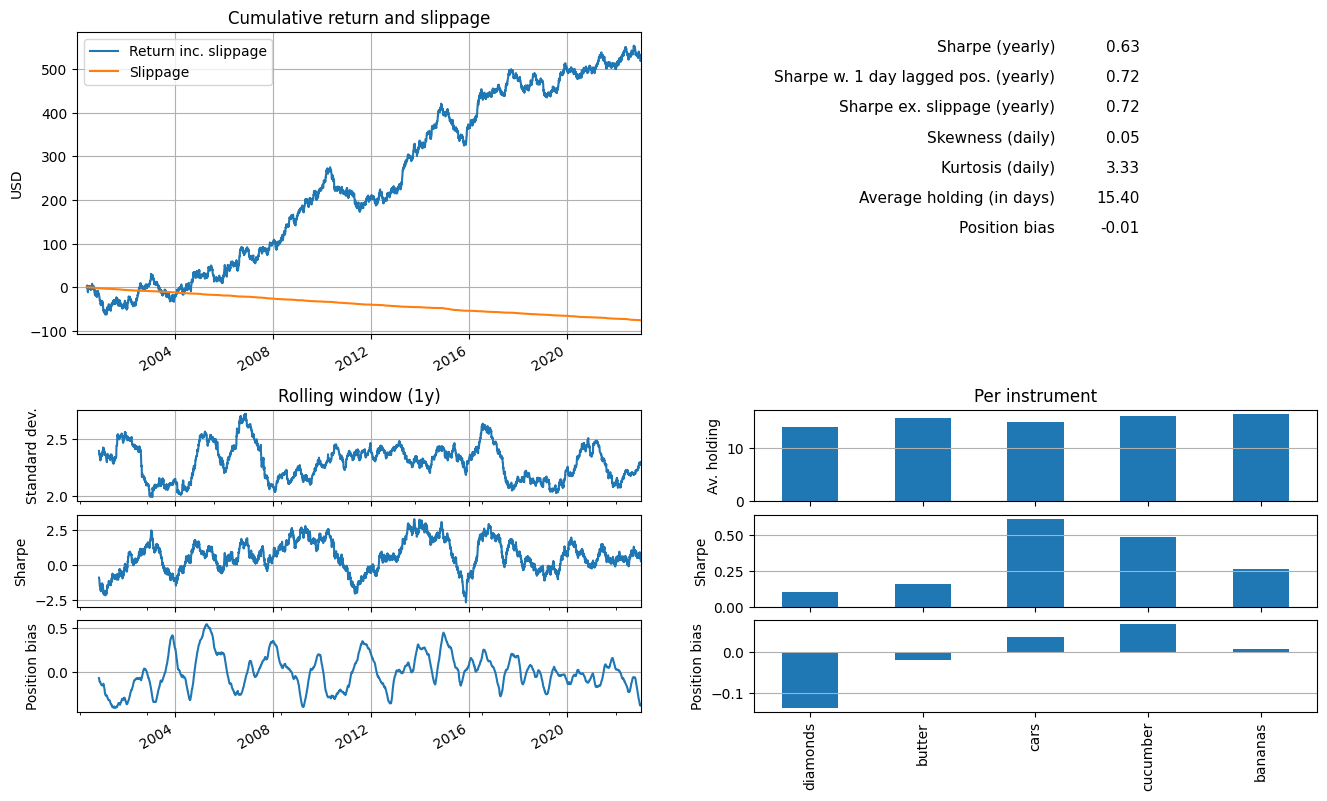

In [6]:
evaluation.plot_key_figures(position, prices)

## save your positions to a file

In [5]:
position.to_csv('results.csv')